In [10]:
# import monai
import pydicom
import pathlib
from glob import glob
import matplotlib.pyplot as plt

In [11]:
mode = 'local'

# Getting the list of dicom images

In [12]:
project_ID = 'project'
experiment_ID = 'LUNG1-001'
scan_ID = '0'

if mode == 'local':
    path = pathlib.Path(f'xnat-data/archive/{project_ID}/arc001/{experiment_ID}/SCANS/{scan_ID}/DICOM/').absolute()
else:
    path = pathlib.Path(f'/data/projects/{project_ID}/experiments/{experiment_ID}/SCANS/{scan_ID}/DICOM/').absolute()

files = list(path.glob('*.dcm'))
# files

 # Loading and visualizing the dicom image

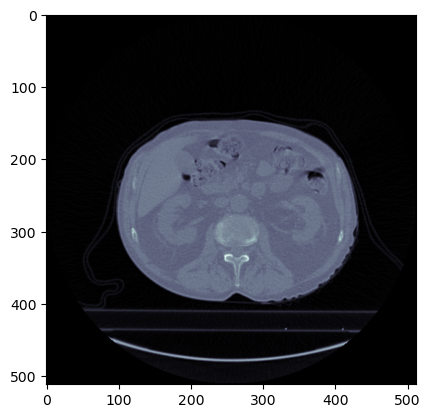

In [13]:
dcm_file = pydicom.dcmread(files[10])

# Visualize the dicom image
fig = plt.figure()
plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)

# plt.savefig('im.jpg')

# Applying transformations using monai library

In [14]:
im = dcm_file.pixel_array 

from monai.transforms import AdjustContrast
adjuster = AdjustContrast(.2)
im2 = adjuster(im)
plt.imshow(im2, cmap=plt.cm.bone)

ModuleNotFoundError: No module named 'monai'

# Connecting to XNAT's REST API 

In [15]:
import pyxnat
mode = 'local'
server_dict = dict(local='http://localhost:80' , jupyterhub_service='http://xnat-web:8080')
interface = pyxnat.Interface(server=server_dict[mode], user='admin', password='admin')

## setting the project

In [30]:
projects_list = list(interface.select.projects())
print('projects_list:', projects_list)

project_index = 0
project_ID = projects_list[project_index].id()
print('project_ID:', project_ID)

project = interface.select.project(project_ID)

if not project.exists():
    print('project does not exist')
    project.insert()
    
project.users()

projects_list: [<Project Object> project `test` (public) 1 subject 1 CT experiment (owner: admin) (created on 2023-05-02 22:56:43.88) http://localhost:80/data/projects/project?format=html]
project_ID: project


['admin']

In [34]:
# list(project.resources())


ll = project.resource('images')
list(ll.files())



[]

## Setting the subject

In [ ]:
subjects = list(project.subjects())
subject_ID = subjects[0].id()
subject = project.subject(subject_ID)

if not subject.exists():
    subject.insert()

## Setting the experiment

In [ ]:
experiment_id = list(subject.experiments())[0].id()
experiment = subject.experiment(experiment_id)

if not experiment.exists():
    experiment.create(experiments='xnat:ctSessionData')

## Setting attributes on the experiment

In [ ]:
experiment.attrs.mset({
    'xnat:mrSessionData/coil' : 'head',
    'xnat:mrSessionData/marker' : 'right',
})

## Creating a new scan for the experiment

In [ ]:
scan = experiment.scan('NewScan')
scan.create(scans='xnat:ctScanData')

### Setting attributes on the scan

In [ ]:
scan.attrs.mset({
    'xnat:ctScanData/parameters/imageType' : 'dicom',
    'xnat:ctScanData/series_description': 'something'
})

### Adding DICOM files to a scan

In [ ]:
dicom_resource = scan.resource('DICOM')
dicom_resource.put_dir()

## Import the DICOM data

In [ ]:
scans = list(experiment.scans())

scan_index = 0
scan = scans[scan_index]
scan

In [ ]:
experiment.children()

In [ ]:
interface.select('/archive').resource(dicom_path).import_(dicom_path, overwrite='append', trigger_pipelines=None)